In [38]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Importing necessary libraries for model development and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [39]:
import pandas as pd
# Read the dataset
dataset_path = "cvd_data_preprocessed.csv"
data = pd.read_csv(dataset_path)
display(data.head(n=5))
df_copy = data.copy()
data.shape

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,10.0,0.000000,0.000000,0.000000,1.0,0.000000,0.250000,0.125000,0.09375
1,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0,10.0,0.348837,0.295420,0.326529,0.0,0.000000,0.250000,0.000000,0.03125
2,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,8.0,0.302326,0.409059,0.491063,0.0,0.133333,0.100000,0.023438,0.12500
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0.0,1.0,11.0,0.697674,0.459064,0.340504,0.0,0.000000,0.250000,0.234375,0.06250
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,12.0,0.953488,0.409059,0.202016,1.0,0.000000,0.066667,0.031250,0.00000


(308774, 19)

In [40]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and the target (y)
X = data.drop("Heart_Disease", axis=1)
y = data["Heart_Disease"]

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X.shape

(308774, 18)

# Training and comparing models

Model: Logistic Regression
F1 Score: 0.11427560587298777
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56677
         1.0       0.56      0.06      0.11      5078

    accuracy                           0.92     61755
   macro avg       0.74      0.53      0.54     61755
weighted avg       0.89      0.92      0.89     61755

Model: Decision Tree
F1 Score: 0.21409779551846142
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     56677
         1.0       0.20      0.23      0.21      5078

    accuracy                           0.86     61755
   macro avg       0.56      0.57      0.57     61755
weighted avg       0.87      0.86      0.86     61755

Model: Random Forest
F1 Score: 0.07496360989810771
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56677
         1.0       0.49      0.04      0.07      5078

    accuracy           

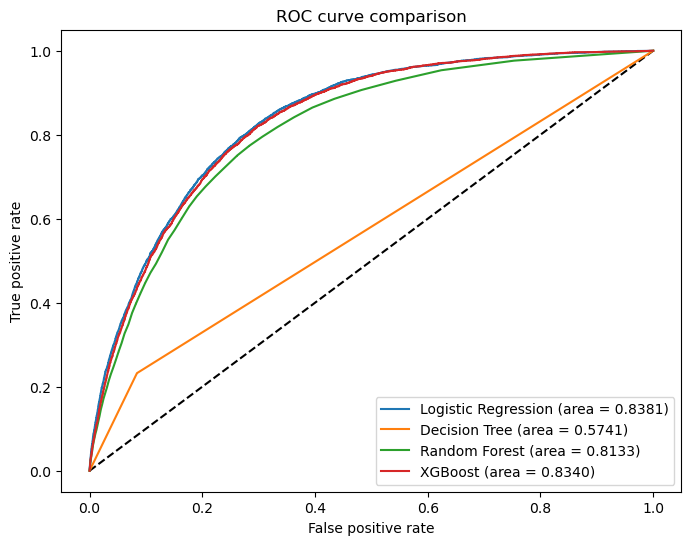

In [42]:
# Defining the function to apply models
def apply_model(model, X_train, y_train, X_test, y_test, name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    print('==========================================================')
    
    # Compute ROC curve and ROC area
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, fpr, tpr, roc_auc

# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=500)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

# Applying the models and storing the results
results = []
roc_curves = []

for name, model in models:
    accuracy, precision, recall, f1, fpr, tpr, roc_auc = apply_model(model, X_train, y_train, X_test, y_test, name)
    results.append((name, accuracy, precision, recall, f1))
    roc_curves.append((name, fpr, tpr, roc_auc))

# Plotting the ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve comparison')
for name, fpr, tpr, roc_auc in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} (area = {roc_auc:.4f})")
plt.legend(loc='best')
plt.show()

Model: Logistic Regression
F1 Score: 0.11427560587298777
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56677
         1.0       0.56      0.06      0.11      5078

    accuracy                           0.92     61755
   macro avg       0.74      0.53      0.54     61755
weighted avg       0.89      0.92      0.89     61755

Model: Decision Tree
F1 Score: 0.21409779551846142
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     56677
         1.0       0.20      0.23      0.21      5078

    accuracy                           0.86     61755
   macro avg       0.56      0.57      0.57     61755
weighted avg       0.87      0.86      0.86     61755

Model: Random Forest
F1 Score: 0.07496360989810771
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56677
         1.0       0.49      0.04      0.07      5078

    accuracy           

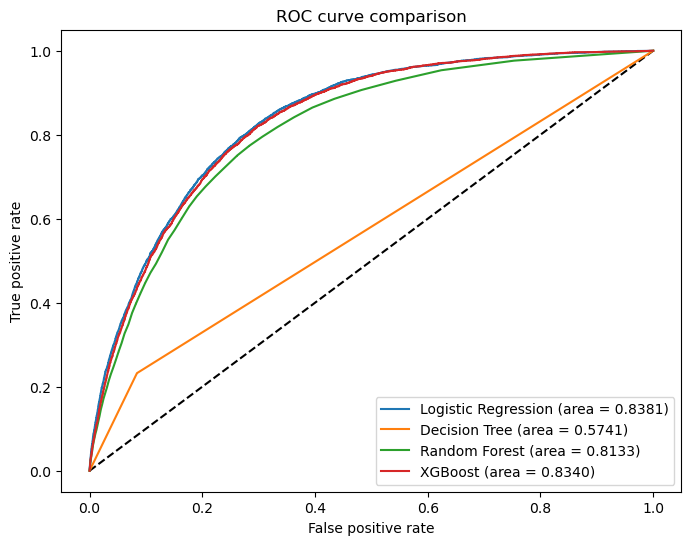

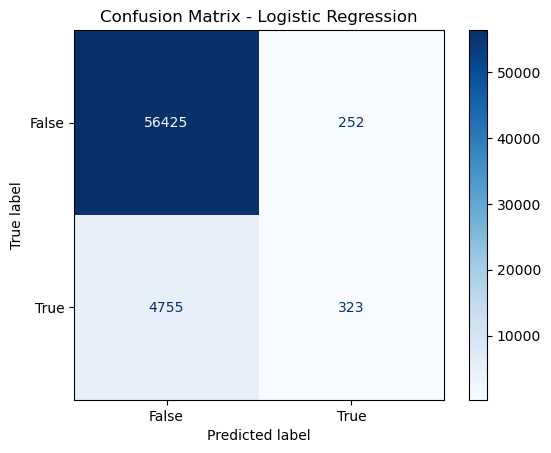

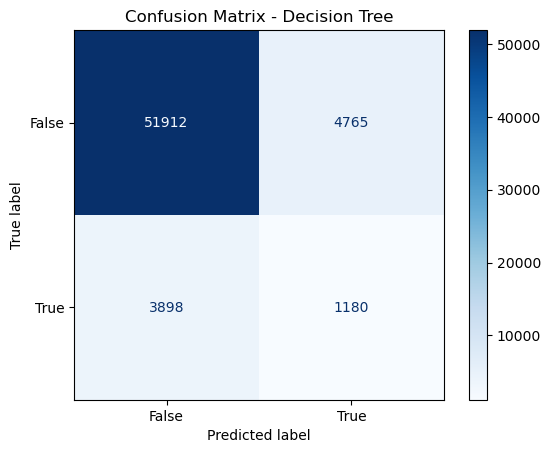

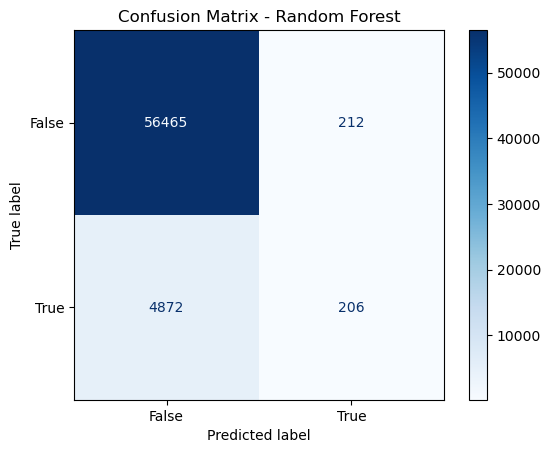

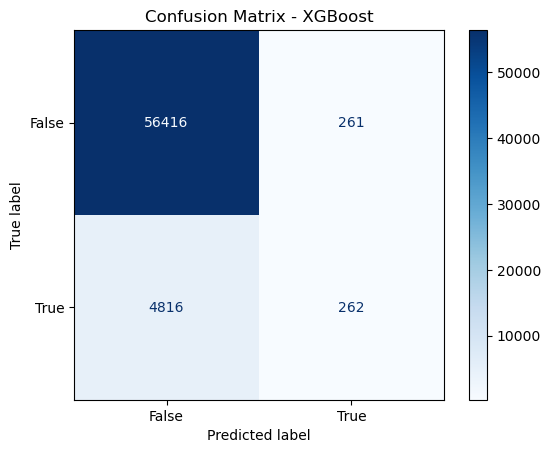

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Defining the function to apply models
def apply_model(model, X_train, y_train, X_test, y_test, name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    print("========================================================")

    # Compute ROC curve and ROC area
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, f1, fpr, tpr, roc_auc, cm

# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=500)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

# Applying the models and storing the results
results = []
roc_curves = []
confusion_matrices = []

for name, model in models:
    accuracy, precision, recall, f1, fpr, tpr, roc_auc, cm = apply_model(model, X_train, y_train, X_test, y_test, name)
    results.append((name, accuracy, precision, recall, f1))
    roc_curves.append((name, fpr, tpr, roc_auc))
    confusion_matrices.append((name, cm))

# Plotting the ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve comparison')
for name, fpr, tpr, roc_auc in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} (area = {roc_auc:.4f})")
plt.legend(loc='best')
plt.show()

# Draw confusion matrices for each model
for name, cm in confusion_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

### KNN model

In [44]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train and X_test are numpy arrays
X_train_knn = np.ascontiguousarray(X_train)
X_test_knn = np.ascontiguousarray(X_test)

# Create a KNN classifier with specified number of neighbors
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the scaled training data
knn_classifier.fit(X_train_knn, y_train)

# Get the predicted labels for the test data
y_pred = knn_classifier.predict(X_test_knn)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Model: k-Nearest Neighbors (KNN)")
print(classification_report(y_test, y_pred))
print('==========================================================')

Model: k-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     56677
         1.0       0.33      0.11      0.17      5078

    accuracy                           0.91     61755
   macro avg       0.63      0.55      0.56     61755
weighted avg       0.88      0.91      0.89     61755



### After using PCA

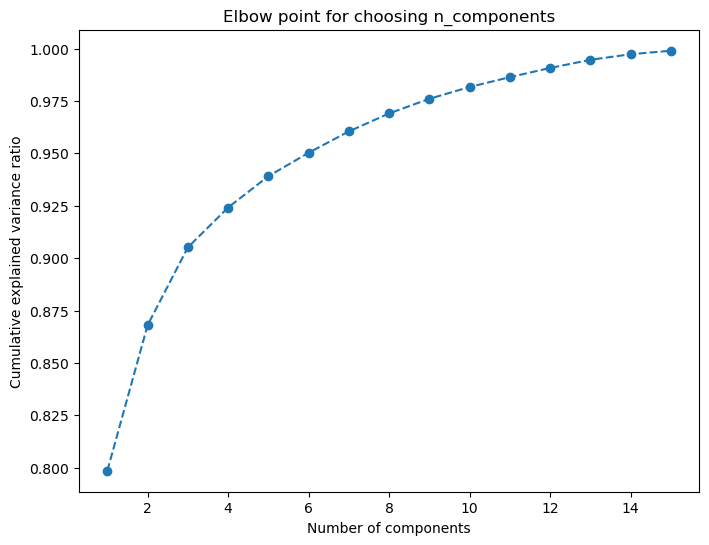

Model: Logistic Regression
F1 Score: 0.11352785145888593
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56677
         1.0       0.56      0.06      0.11      5078

    accuracy                           0.92     61755
   macro avg       0.74      0.53      0.54     61755
weighted avg       0.89      0.92      0.89     61755

Model: Decision Tree
F1 Score: 0.2180935486882644
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     56677
         1.0       0.21      0.23      0.22      5078

    accuracy                           0.86     61755
   macro avg       0.57      0.58      0.57     61755
weighted avg       0.87      0.86      0.87     61755

Model: Random Forest
F1 Score: 0.12211221122112212
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     56677
         1.0       0.38      0.07      0.12      5078

    accuracy            

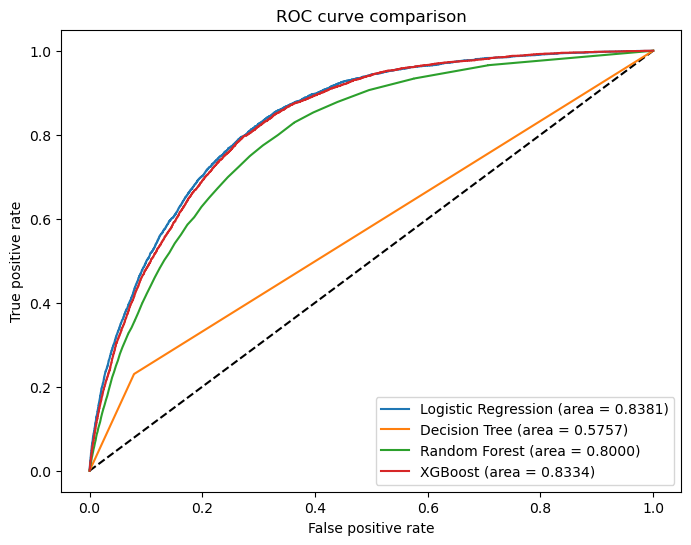

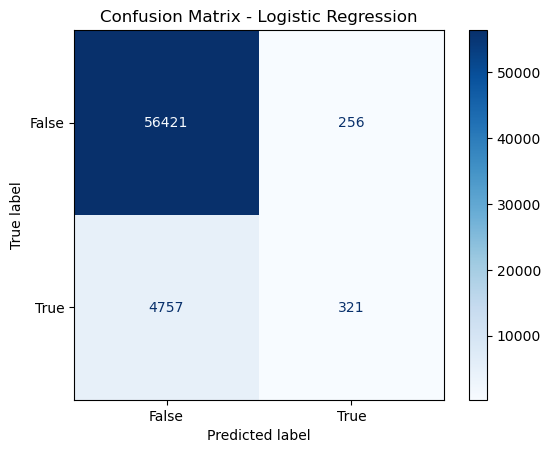

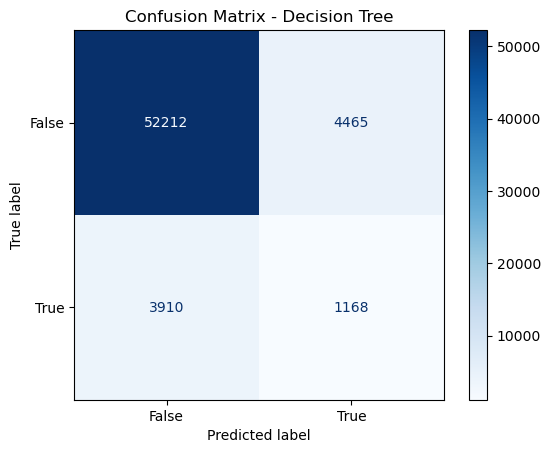

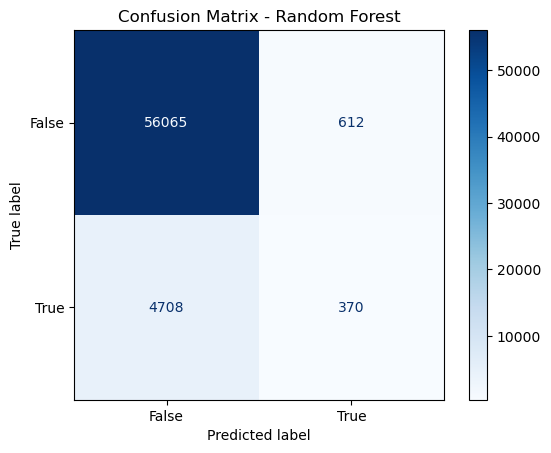

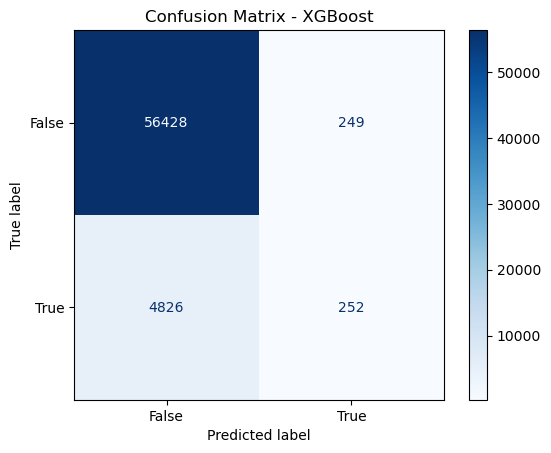

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining the function to apply models
def apply_model(model, X_train, y_train, X_test, y_test, name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    print("========================================================")

    # Compute ROC curve and ROC area
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, f1, fpr, tpr, roc_auc, cm

# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=500)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

# Applying PCA to reduce the dimensionality of the data
pca = PCA(n_components=15) # You can change the number of components as per your requirement
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Calculating the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the cumulative sum of the explained variance ratio as a function of the number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Elbow point for choosing n_components')
plt.show()


# Applying the models and storing the results
results = []
roc_curves = []
confusion_matrices = []

for name, model in models:
    accuracy, precision, recall, f1, fpr, tpr, roc_auc, cm = apply_model(model, X_train_pca, y_train, X_test_pca, y_test, name)
    results.append((name, accuracy, precision, recall, f1))
    roc_curves.append((name, fpr, tpr, roc_auc))
    confusion_matrices.append((name, cm))

# Plotting the ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve comparison')
for name, fpr, tpr, roc_auc in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} (area = {roc_auc:.4f})")
plt.legend(loc='best')
plt.show()

# Draw confusion matrices for each model
for name, cm in confusion_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

### After balancing out the samples

Model: Logistic Regression
F1 Score: 0.3294769431318234
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755

Model: Decision Tree
F1 Score: 0.20566466002171124
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     56677
         1.0       0.21      0.21      0.21      5078

    accuracy                           0.87     61755
   macro avg       0.57      0.57      0.57     61755
weighted avg       0.87      0.87      0.87     61755

Model: Random Forest
F1 Score: 0.06522920818988948
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56677
         1.0       0.41      0.04      0.07      5078

    accuracy            

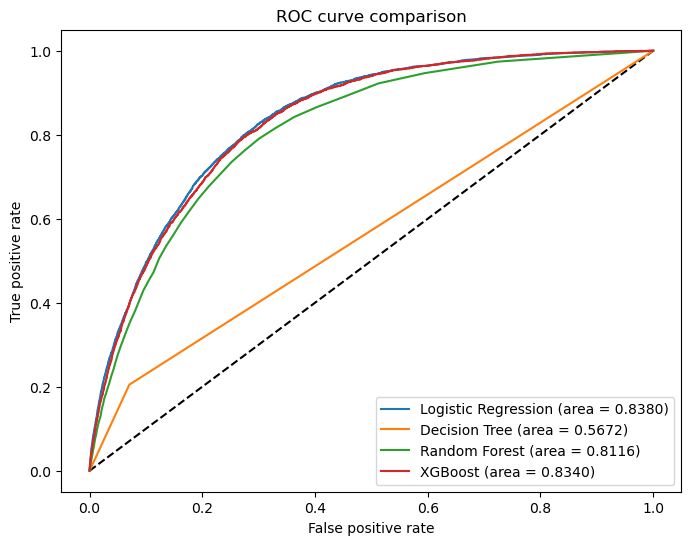

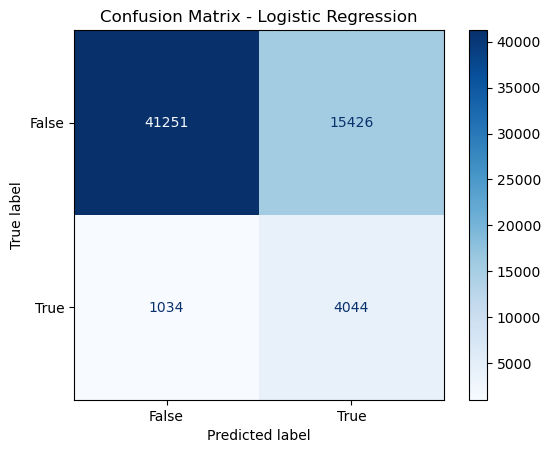

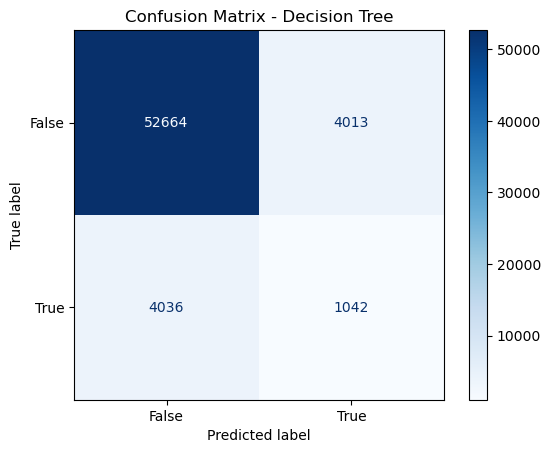

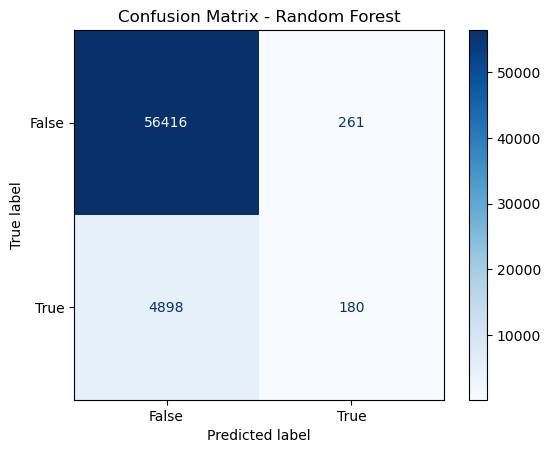

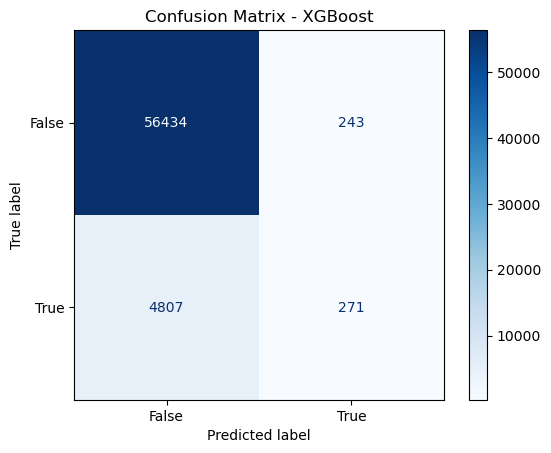

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define the function to apply models
def apply_model(model, X_train, y_train, X_test, y_test, name):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"F1 Score: {f1}")
    print(classification_report(y_test, y_pred))
    print("============================================")

    # Compute ROC curve and ROC area
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, precision, recall, f1, fpr, tpr, roc_auc, cm

# Define the models with class_weight='balanced'
models = [
    ("Logistic Regression", LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)),
    ("Decision Tree", DecisionTreeClassifier(class_weight='balanced', random_state=42)),
    ("Random Forest", RandomForestClassifier(class_weight='balanced', random_state=42)),
    ("XGBoost", XGBClassifier(scale_pos_weight=1, eval_metric='logloss', random_state=42)),
]

# Applying the models and storing the results
results = []
roc_curves = []
confusion_matrices = []

for name, model in models:
    accuracy, precision, recall, f1, fpr, tpr, roc_auc, cm = apply_model(model, X_train, y_train, X_test, y_test, name)
    results.append((name, accuracy, precision, recall, f1))
    roc_curves.append((name, fpr, tpr, roc_auc))
    confusion_matrices.append((name, cm))

# Plotting the ROC curves for each model
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve comparison')
for name, fpr, tpr, roc_auc in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} (area = {roc_auc:.4f})")
plt.legend(loc='best')
plt.show()

# Draw confusion matrices for each model
for name, cm in confusion_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Sample data (replace with your actual data)
X = np.random.rand(100, 10)
y = np.random.randint(2, size=100)

# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=500)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

# Applying k-fold cross-validation for each model
for name, model in models:
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_aucs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        roc_aucs.append(roc_auc_score(y_test, y_pred_proba))

    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    avg_roc_auc = np.mean(roc_aucs)

    print(f"Model: {name} (K-Fold Cross-Validation)")
    print(f"Avg F1 Score: {avg_f1:.4f}")
    print(f"Avg Accuracy: {avg_accuracy:.4f}")
    print(f"Avg Precision: {avg_precision:.4f}")
    print(f"Avg Recall: {avg_recall:.4f}")
    print(f"Avg ROC AUC: {avg_roc_auc:.4f}")
    print('==========================================================')

Model: Logistic Regression (K-Fold Cross-Validation)
Avg F1 Score: 0.4605
Avg Accuracy: 0.4500
Avg Precision: 0.4833
Avg Recall: 0.5144
Avg ROC AUC: 0.5318
Model: Decision Tree (K-Fold Cross-Validation)
Avg F1 Score: 0.5440
Avg Accuracy: 0.5500
Avg Precision: 0.5862
Avg Recall: 0.5621
Avg ROC AUC: 0.5715
Model: Random Forest (K-Fold Cross-Validation)
Avg F1 Score: 0.4599
Avg Accuracy: 0.4800
Avg Precision: 0.5367
Avg Recall: 0.4681
Avg ROC AUC: 0.5652
Model: XGBoost (K-Fold Cross-Validation)
Avg F1 Score: 0.5369
Avg Accuracy: 0.5600
Avg Precision: 0.6116
Avg Recall: 0.5471
Avg ROC AUC: 0.6487


# Hyperparameter tuning for Logistic regression

In [65]:
# Create a logistic regression object with class weight and a lower threshold
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
threshold = 0.5

# Fit the model on the scaled training data
log_reg.fit(X_train, y_train)

# Get the probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression")
print(classification_report(y_test, y_pred))
print('==========================================================')

Model: Logistic regression
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create a Logistic Regression classifier object
logreg_classifier = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)

# Define the parameter grid for the Logistic Regression classifier
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Create a grid search object with F1-score as the scoring metric and n_jobs=-1
grid_search = GridSearchCV(logreg_classifier, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the model on the training data using grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Get the best model from the grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions
y_pred = best_logreg_model.predict(X_test)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Logistic Regression with hyperparameter tuning")
print(classification_report(y_test, y_pred))
print('==========================================================')

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.32413002218453657
Model: Logistic Regression with hyperparameter tuning
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create a Logistic Regression classifier object
logreg_classifier = LogisticRegression(class_weight='balanced', random_state=42)

# Define the parameter distribution for the Logistic Regression classifier
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Create a randomized search object with roc_auc as the scoring metric and n_iter=20
random_search = RandomizedSearchCV(logreg_classifier, param_dist, scoring='roc_auc', n_iter=20, cv=5, n_jobs=-1)

# Fit the model on the training data using random search
random_search.fit(X_train, y_train)

# Print the best parameters and score
print(random_search.best_params_)
print(random_search.best_score_)

# Get the best model from the random search
best_logreg_model = random_search.best_estimator_

# Make predictions
y_pred = best_logreg_model.predict(X_test)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Logistic Regression with hyperparameter tuning")
print(classification_report(y_test, y_pred))
print('==========================================================')

C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ziyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

{'solver': 'liblinear', 'penalty': 'l2', 'l1_ratio': 0.9, 'C': 0.1}
0.8338643768850357
Model: Logistic Regression with hyperparameter tuning
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755



## Tuned Logistic regression

Model: Logistic regression
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755



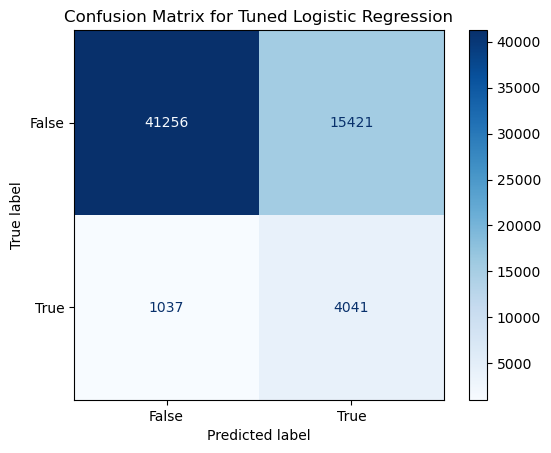

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

threshold = 0.5

# Fit the model on the scaled training data
log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', random_state=42, max_iter=500)

# Fit the model on the scaled training data
log_reg.fit(X_train, y_train)

# Get the probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression")
print(classification_report(y_test, y_pred))
print('==========================================================')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for Tuned Logistic Regression')
plt.show()

Model: Logistic regression
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86     56677
         1.0       0.23      0.74      0.35      5078

    accuracy                           0.77     61755
   macro avg       0.60      0.76      0.60     61755
weighted avg       0.91      0.77      0.82     61755



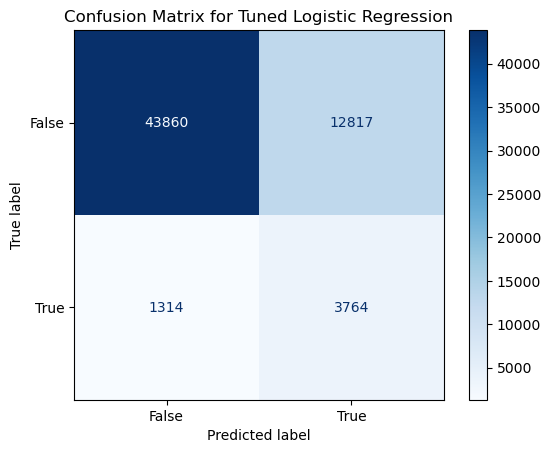

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

threshold = 0.555

# Fit the model on the scaled training data
log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', random_state=42, max_iter=500)

# Fit the model on the scaled training data
log_reg.fit(X_train, y_train)

# Get the probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression")
print(classification_report(y_test, y_pred))
print('==========================================================')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for Tuned Logistic Regression')
plt.show()

Model: Logistic regression
              precision    recall  f1-score   support

         0.0       0.97      0.77      0.86     56677
         1.0       0.23      0.74      0.35      5078

    accuracy                           0.77     61755
   macro avg       0.60      0.76      0.60     61755
weighted avg       0.91      0.77      0.82     61755



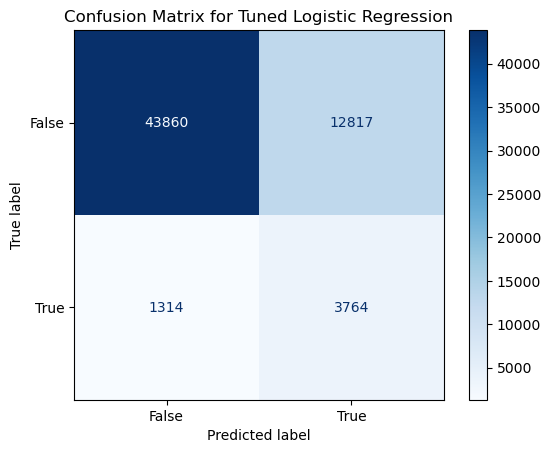

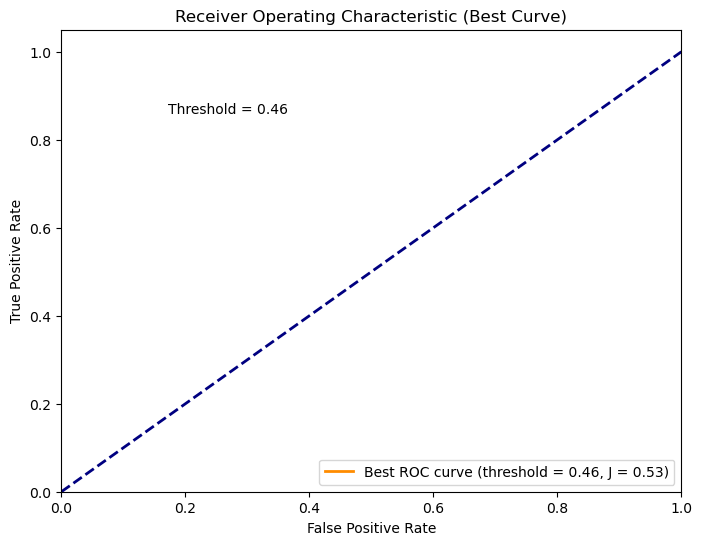

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import numpy as np

threshold = 0.555

# Fit the model on the scaled training data
log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', random_state=42, max_iter=500)

# Fit the model on the scaled training data
log_reg.fit(X_train, y_train)

# Get the probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression")
print(classification_report(y_test, y_pred))
print('==========================================================')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for Tuned Logistic Regression')
plt.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate Youden's J statistic for each threshold
youden_j = tpr - fpr

# Find the index of the threshold that maximizes Youden's J
best_threshold_index = np.argmax(youden_j)

# Plot only the best ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr[best_threshold_index], tpr[best_threshold_index], color='darkorange', lw=2, label=f'Best ROC curve (threshold = {thresholds[best_threshold_index]:.2f}, J = {youden_j[best_threshold_index]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Best Curve)')
plt.legend(loc="lower right")

# Annotate the best threshold value on the plot
plt.annotate(f'Threshold = {thresholds[best_threshold_index]:.2f}', (fpr[best_threshold_index], tpr[best_threshold_index]), textcoords="offset points", xytext=(-15,10), ha='center')

plt.show()

### With best threshold

Model: Logistic regression
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     56677
         1.0       0.20      0.83      0.32      5078

    accuracy                           0.71     61755
   macro avg       0.59      0.76      0.56     61755
weighted avg       0.91      0.71      0.77     61755



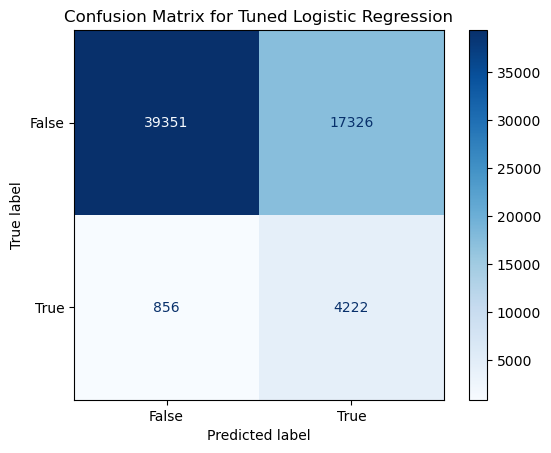

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

threshold = 0.46

# Fit the model on the scaled training data
log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', random_state=42, max_iter=500)

# Fit the model on the scaled training data
log_reg.fit(X_train, y_train)

# Get the probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression")
print(classification_report(y_test, y_pred))
print('==========================================================')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for Tuned Logistic Regression')
plt.show()

### Using Gridsearch and cross validation to check for best parameters

In [11]:
# Import the necessary libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create a logistic regression classifier object
logreg_classifier = LogisticRegression(random_state=42)

# Define the parameter grid for the logistic regression classifier
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a grid search object with F1-score as the scoring metric and n_jobs=-1
grid_search = GridSearchCV(logreg_classifier, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the model on the scaled training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Create an instance of SMOTE and TomekLinks resampling
resampling = SMOTE(sampling_strategy='minority')
tomek = TomekLinks(sampling_strategy='majority')

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = resampling.fit_resample(X_train, y_train)

# Undersample the training data using TomekLinks after SMOTE
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train_resampled, y_train_resampled)

# Fit the best model on the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Make predictions based on the threshold
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic Regression with SMOTE and TomekLinks resampling")
print(classification_report(y_test, y_pred))
print('==========================================================')

{'C': 10, 'solver': 'liblinear'}
0.10738332290856571
Model: Logistic regression with random undersampling and grid search
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755



In [36]:
# Import the library
from imblearn.under_sampling import RandomUnderSampler
# Create a logistic regression object with class weight and a lower threshold
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
threshold = 0.5 # Adjust the threshold according to your needs

# Fit the model on the scaled training data
log_reg.fit(X_train, y_train)

# Create an instance of the RandomUnderSampler with a 1:1 ratio
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Fit the model on the resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions based on the threshold
y_pred_proba = log_reg.predict_proba(X_test)[:, 1] # Use log_reg instead of best_model
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression with random undersampling")
print(classification_report(y_test, y_pred))
print('==========================================================')


Model: Logistic regression with random undersampling
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755



In [12]:
# Import pandas
import pandas as pd

# Convert the cv_results_ dictionary into a data frame
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Display the data frame
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.640406,0.113071,0.030447,0.004711,0.001,newton-cg,"{'C': 0.001, 'solver': 'newton-cg'}",0.072329,0.075375,0.068448,0.073471,0.071111,0.072147,0.002322,27
1,0.869163,0.080196,0.027139,0.000554,0.001,lbfgs,"{'C': 0.001, 'solver': 'lbfgs'}",0.072329,0.075375,0.068448,0.073471,0.071111,0.072147,0.002322,27
2,0.592992,0.010029,0.026704,0.001436,0.001,liblinear,"{'C': 0.001, 'solver': 'liblinear'}",0.091631,0.090032,0.088504,0.099842,0.083657,0.090733,0.005278,26
3,1.422102,0.062028,0.027198,0.001580,0.001,sag,"{'C': 0.001, 'solver': 'sag'}",0.072329,0.075375,0.068448,0.073471,0.071111,0.072147,0.002322,27
4,1.833016,0.076175,0.027013,0.001119,0.001,saga,"{'C': 0.001, 'solver': 'saga'}",0.072329,0.075375,0.068448,0.073471,0.071111,0.072147,0.002322,27
5,1.796245,0.044705,0.027328,0.000387,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.096730,0.107717,0.095713,0.102968,0.103060,0.101238,0.004453,24
6,1.429598,0.176245,0.027600,0.000492,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.096774,0.108145,0.095735,0.102968,0.103060,0.101336,0.004565,22
7,0.820637,0.015657,0.028531,0.001243,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.094742,0.107790,0.095668,0.110342,0.101527,0.102014,0.006263,21
8,1.900707,0.047489,0.027265,0.001211,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.096730,0.108145,0.095713,0.102968,0.103060,0.101323,0.004579,23
9,1.864034,0.067794,0.026647,0.000950,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.096730,0.107717,0.095713,0.102968,0.103060,0.101238,0.004453,24


In [13]:
# Import the library
from imblearn.under_sampling import RandomUnderSampler

# Create a logistic regression object with the best parameters
log_reg = LogisticRegression(C=10, solver='liblinear', random_state=42, max_iter=500)
threshold = 0.5

# Create an instance of the RandomUnderSampler with a 1:1 ratio
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Fit the model on the resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Calculate predicted probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Logistic regression with random undersampling and best parameters")
print(classification_report(y_test, y_pred))
print('==========================================================')

Model: Logistic regression with random undersampling and best parameters
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755



In [16]:
# Import the libraries
from imblearn.over_sampling import SMOTE
from sklearn.metrics import fbeta_score

# Create a logistic regression object with class weight and a lower threshold
log_reg = LogisticRegression(random_state=42, max_iter=500)
threshold = 0.5

# Create an instance of SMOTE with a 1:1 ratio
smote = SMOTE(random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the model on the resampled training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2) # Use F2-score to give more weight to recall

# Print the results
print(f"Model: Logistic regression with SMOTE and F2-score")
print(classification_report(y_test, y_pred))
print(f"F2-score: {f2:.3f}")
print('==========================================================')

Model: Logistic regression with SMOTE and F2-score
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.83     56677
         1.0       0.21      0.80      0.33      5078

    accuracy                           0.73     61755
   macro avg       0.59      0.76      0.58     61755
weighted avg       0.91      0.73      0.79     61755

F2-score: 0.509


# Hyperparameter tuning for decision tree

In [27]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create a Decision Tree classifier object
tree_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for the Decision Tree classifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object with F1-score as the scoring metric and n_jobs=-1
grid_search = GridSearchCV(tree_classifier, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the model on the training data using grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Get the best model from the grid search
best_tree_model = grid_search.best_estimator_

# Make predictions
y_pred = best_tree_model.predict(X_test)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Model: Decision Tree with hyperparameter tuning")
print(classification_report(y_test, y_pred))
print('==========================================================')

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.21202895809586844
Model: Decision Tree with hyperparameter tuning
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     56677
         1.0       0.20      0.23      0.21      5078

    accuracy                           0.86     61755
   macro avg       0.56      0.57      0.57     61755
weighted avg       0.87      0.86      0.86     61755



# Ensembling technique

In [15]:
# Import the library
from sklearn.ensemble import VotingClassifier # Import VotingClassifier

# Create a logistic regression object with class weight and a lower threshold
log_reg = LogisticRegression(C=10, solver='liblinear', random_state=42, max_iter=500)
threshold = 0.5

# Create other base classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create a voting classifier with soft voting
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', dt), ('rf', rf), ('gb', gb)], voting='soft')

# Fit the model on the scaled training data
voting_clf.fit(X_train, y_train)

# Make predictions based on the weighted average of probabilities
y_pred = voting_clf.predict(X_test)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Voting classifier with soft voting")
print(classification_report(y_test, y_pred))
print('==========================================================')


Model: Voting classifier with soft voting
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     56677
         1.0       0.44      0.10      0.16      5078

    accuracy                           0.92     61755
   macro avg       0.68      0.54      0.56     61755
weighted avg       0.88      0.92      0.89     61755



In [17]:
# Import the libraries
from sklearn.ensemble import VotingClassifier # Import VotingClassifier
from imblearn.over_sampling import SMOTE

# Create a logistic regression object with class weight and a lower threshold
log_reg = LogisticRegression(random_state=42, max_iter=500)
threshold = 0.5

# Create other base classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Create a voting classifier with weighted voting
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', dt), ('rf', rf), ('gb', gb)], voting='soft', weights=[1, 1, 2, 3])

# Create an instance of SMOTE with a 1:1 ratio
smote = SMOTE(random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Fit the model on the resampled training data
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions based on the weighted average of probabilities
y_pred = voting_clf.predict(X_test)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Voting classifier with weighted voting and SMOTE")
print(classification_report(y_test, y_pred))
print('==========================================================')

Model: Voting classifier with weighted voting and SMOTE
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     56677
         1.0       0.31      0.32      0.31      5078

    accuracy                           0.89     61755
   macro avg       0.63      0.63      0.63     61755
weighted avg       0.89      0.89      0.89     61755



## Ensembling technique using tuned Logistic regression and gradient boosting models (with balanced sampling)

In [8]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create a logistic regression object with class weight and a lower threshold
log_reg = LogisticRegression(C=10, solver='liblinear', random_state=42, max_iter=500)

# Create other base classifiers
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Create a voting classifier with soft voting
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('xgb', xgb)], voting='soft')

# Fit the model on the scaled training data
voting_clf.fit(X_train, y_train)

# Make predictions based on the weighted average of probabilities
y_pred = voting_clf.predict(X_test)

# Evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Model: Voting classifier with soft voting")
print(classification_report(y_test, y_pred))
print('==========================================================')

C:\Users\ziyan\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\ziyan\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: Voting classifier with soft voting
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56677
         1.0       0.54      0.05      0.09      5078

    accuracy                           0.92     61755
   macro avg       0.73      0.52      0.53     61755
weighted avg       0.89      0.92      0.89     61755



## Ensembling technique using logistic regression and random forest

Model: Ensemble (Voting Classifier)
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93     56677
         1.0       0.33      0.42      0.37      5078

    accuracy                           0.88     61755
   macro avg       0.64      0.67      0.65     61755
weighted avg       0.90      0.88      0.89     61755



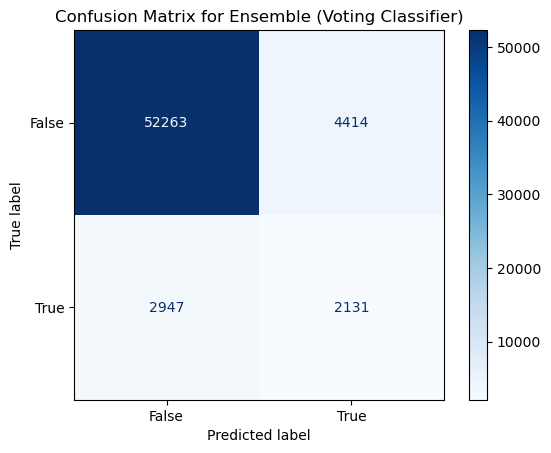

In [77]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create individual models
log_reg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', class_weight='balanced', random_state=42, max_iter=500)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier that combines the models
voting_classifier = VotingClassifier(estimators=[('lr', log_reg), ('rf', random_forest)], voting='soft')

# Fit the Voting Classifier on the scaled training data
voting_classifier.fit(X_train, y_train)

# Get predictions
y_pred_ensemble = voting_classifier.predict(X_test)

# Evaluate the performance metrics for the ensemble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

# Print the results for the ensemble
print("Model: Ensemble (Voting Classifier)")
print(classification_report(y_test, y_pred_ensemble))
print('==========================================================')

# Calculate and display the confusion matrix for the ensemble
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=["False", "True"])
disp_ensemble.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Ensemble (Voting Classifier)")
plt.show()

# Checking the feature importance

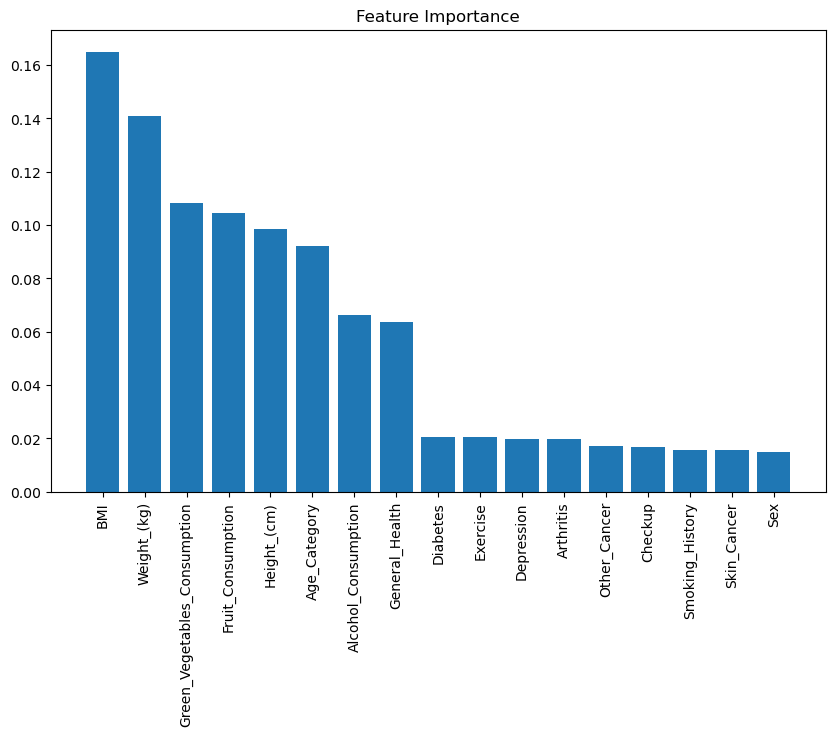

In [37]:
# Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = list(X_train.columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.show()